In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import  ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/pc/Desktop/1/zindi/third project/digital-green-crop-yield-estimate-challenge20230912-4562-1bbmstk"

train = pd.read_csv(path + "/train.csv")
train

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,ID_7ZZQ6R4XB4FK,Nalanda,Rajgir,28,28,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-02,6,LineSowingAfterTillage,2022-06-29,...,machine,2022-11-29,NaN,2022-12-14,machine,25,40,plowed_in_soil,0.375000,720
3866,ID_PVVDF6LK6FO8,Vaishali,Mahua,5,5,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-06,5,Manual_PuddledRandom,2022-07-08,...,hand,2022-10-10,4.0,2022-11-05,hand,30,10,plowed_in_soil,0.136364,250
3867,ID_RBYVUPRATVMW,Nalanda,Noorsarai,50,45,TractorPlough,2022-07-07,5,Manual_PuddledRandom,2022-06-15,...,hand,2022-10-20,1200.0,2022-10-30,hand,25,10,plowed_in_soil,0.375000,600
3868,ID_ARE9QWENJNJ2,Jamui,Khaira,20,20,TractorPlough,2022-07-12,3,Manual_PuddledRandom,2022-06-28,...,hand,2022-11-09,100.0,2022-12-10,hand,25,10,plowed_in_soil,0.227273,400


In [7]:
train["FirstTopDressFert"].value_counts()

Urea            2798
DAP Urea         322
Urea DAP         177
DAP               64
NPKS Urea          6
Urea NPKS          5
NPK                3
DAP NPKS           3
NPK Urea           2
DAP NPK Urea       1
Urea NPK           1
DAP NPK            1
Urea SSP           1
Other Urea         1
Name: FirstTopDressFert, dtype: int64

In [4]:
NoFertilizerAppln

NameError: name 'NoFertilizerAppln' is not defined

In [ ]:
TransplantingIrrigationPowerSource, TransIrriCost, Ganaura, CropOrgFYM

In [ ]:
date: RcNursEstDate SeedingSowingTransplanting CropTillageDate
mapping: SeedlingsPerPit , TransplantingIrrigationHours, StandingWater, OrgFertilizers

NursDetFactor TransDetFactor*

In [ ]:
["District", "Block", "CultLand", 'CropCultLand','LandPreparationMethod','CropTillageDate', 'CropTillageDepth'

"CropEstMethod", "RcNursEstDate", "SeedingSowingTransplanting", "SeedlingsPerPit" "NursDetFactor", "TransDetFactor",
"TransplantingIrrigationHours", "TransplantingIrrigationSource", "OrgFertilizers", "StandingWater",
"PCropSolidOrgFertAppMethod", "NoFertilizerAppln", "CropbasalFerts","BasalUrea", "BasalDAP","MineralFertAppMethod",
"FirstTopDressFert"]

In [226]:
train.columns

Index(['ID', 'District', 'Block', 'CultLand', 'CropCultLand',
       'LandPreparationMethod', 'CropTillageDate', 'CropTillageDepth',
       'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting',
       'SeedlingsPerPit', 'NursDetFactor', 'TransDetFactor',
       'TransplantingIrrigationHours', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'TransIrriCost', 'StandingWater',
       'OrgFertilizers', 'Ganaura', 'CropOrgFYM', 'PCropSolidOrgFertAppMethod',
       'NoFertilizerAppln', 'CropbasalFerts', 'BasalDAP', 'BasalUrea',
       'MineralFertAppMethod', 'FirstTopDressFert', '1tdUrea', '1appDaysUrea',
       '2tdUrea', '2appDaysUrea', 'MineralFertAppMethod.1', 'Harv_method',
       'Harv_date', 'Harv_hand_rent', 'Threshing_date', 'Threshing_method',
       'Residue_length', 'Residue_perc', 'Stubble_use', 'Acre', 'Yield'],
      dtype='object')

In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [228]:
date_col=["Threshing_date", "RcNursEstDate", "Harv_date", "CropTillageDate", "RcNursEstDate", "SeedingSowingTransplanting"]
for col in date_col:
    train[col]= pd.to_datetime(train[col])

In [ ]:
[]

In [229]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  3870 non-null   object        
 1   District                            3870 non-null   object        
 2   Block                               3870 non-null   object        
 3   CultLand                            3870 non-null   int64         
 4   CropCultLand                        3870 non-null   int64         
 5   LandPreparationMethod               3870 non-null   object        
 6   CropTillageDate                     3870 non-null   datetime64[ns]
 7   CropTillageDepth                    3870 non-null   int64         
 8   CropEstMethod                       3870 non-null   object        
 9   RcNursEstDate                       3787 non-null   datetime64[ns]
 10  SeedingSowingTransplanti

In [1]:
# am about to write my first python code
print("Hello World! ")

Hello World! 


In [ ]:
# variable and identifier

In [2]:
name = "olaitan"
print(name)

olaitan


# Operator and Oprand in python
- operator are used to manipulate oprand
- oprand are two are more variable

1. Arithmetic
2. comparison
3. Assignment
4. membership
5. identity
6. Logical
7. bitwise 

# Arithmetic

In [3]:
# Addition (+)
num1 = 7
num2 = 13
total = num1 + num2  
print(total)

20


In [4]:
# Subtraction (-)
num1 = 7
num2 = 13
total = num1 - num2  
print(total)

-6


In [5]:
# division (/)
num1 = 7
num2 = 13
total = num1 / num2  
print(total)

0.5384615384615384


In [6]:
# Power (**)
num1 = 7
num2 = 13
total = num1 ** num2  
print(total)

96889010407


In [7]:
# Modulus (%): IS USED TO RETURN REMAINDER OF DIVISION
num1 = 7
num2 = 13
total = num2 % num1
print(total)

6


# Comparison
is used to compear variables, it return bollean result, True or False

In [8]:
# greater (>) 
num1 = 4
num2 = 8
num1 > num2

False

In [10]:
# greater (>=) 
num1 = 4
num2 = 4
num1 >= num2

True

In [11]:
# less (<) 
num1 = 4
num2 = 8
num1 < num2

True

In [12]:
# less (<=) 
num1 = 4
num2 = 8
num1 <= num2

True

In [14]:
# equal to (==)
num1 = 7
num2 = 7
num1== num2

True

In [15]:
# not equal to(!=)
num1 = 7
num2 = 7
num1 != num2

False

# Assignment

In [ ]:
# equal sign (=)
name = "olaitan"

In [18]:
# increament(+=)
num = 5
num+=2 # add two to the current value of num variable
print(num)

7


In [19]:
# decreament(-=)
num = 5
num-=2 # minus two to the current value of num variable
print(num)

3


In [ ]:
# membership
in, not in 

In [20]:
name = "olaitan"
"o" in name

True

In [21]:
name = "olaitan"
"o" not in name

False

In [22]:
name = "olaitan"
"k" not in name

True

# identify 
is, is not

In [26]:
("ola") is ("ola")

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\pc\AppData\Local\Temp\ipykernel_7980\2470943968.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ("ola") is( "ola")


True

In [27]:
("ola") is not ("ola")

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\pc\AppData\Local\Temp\ipykernel_7980\1382689674.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  ("ola") is not ("ola")


False

In [ ]:
# logical operator
or/and

In [29]:
a =6
b =7
c =8
(a>b) or (b<c)

True

In [30]:
a =6
b =7
c =8
(a>b) and (b<c)

False

# Data type in python
### type of datatype
Mutable Datatype: are kind of datatype that can modify after declaration 
- list
- Dictionary
Immutable Datatype: are kind of datatype that can not modify after declaration 
- Number
- string
- tuple
- set

In [1]:
# number
num1 = 8389 # int
num2 = 83.89 # float
num3 = 8 + 3j  # complex

In [ ]:
# string: they are sequence of characters
name = "olaitan"
name2 = 'kola'

# indexing and slicing
- indexing is the processing of getting character of string in a postion
- slicing is the processing of getting characters of string within range

In [2]:
var = "python can be use to build cool things"

In [4]:
# return p from the variable above
var[0]

'p'

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [7]:
path = "C:/Users/pc/Documents/Lasop/Deep Learning/file/"
df = pd.read_csv(path + "winequality.csv")

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
X = df.copy()
y = X.pop("quality")

In [64]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [65]:
input_shape=X.shape[1]

In [66]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2 , random_state=42)

In [67]:
# model = keras.Sequential([
#     layers.Dense(units=1, input_shape=[1]),
#     layers.Activation("elu")
# ])

In [68]:
# x = tf.linspace(-1.0, 1.0, 100)
# y = model.predict(x)
# plt.plot(x, y, "k")

# Deep Learning
Deep learning is method in AI, that focus on teaching computer to process data as inspired by human brain

In [69]:
#pip install --upgrade pip

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build the model
building a naive model

In [71]:
- shadow network
- wide network
- deep network

overfitt
underfit

SyntaxError: invalid syntax (4032682212.py, line 1)

In [72]:
network = keras.Sequential( [ 
          layers.Dense(units=512, input_shape=[input_shape]), # input layer
          layers.Dropout(0.2), # to avoid overfitting
          layers.Activation("relu"),
        
        layers.Dense(units=360), # first hidden layer
        layers.Dropout(0.2), # to avoid overfitting
        layers.Activation("tanh"),
    
        layers.Dense(units=562), # second hidden layer
        layers.Dropout(0.2), # to avoid overfitting
        layers.Activation("relu"),
    
        layers.Dense(units=562), # third hidden layer
        layers.Dropout(0.2), # to avoid overfitting
        layers.Activation("relu"),
    
        layers.Dense(units=562), # fouth hidden layer
        layers.Dropout(0.2), # to avoid overfitting
        layers.Activation("relu"),
    
        layers.Dense(units=1), # output layer
       
    
] )

In [73]:
# x = tf.linspace(-1.0, 1.0, 100)
# y = network.predict(x)

In [74]:
# plt.plot(x, y, "k")

In [75]:
#network.weights

# compile the model
what to do and how to do
  

In [76]:
# # Example for Mean Squared Error (MSE) loss in regression
network.compile(loss='mae', optimizer='adam', metrics="mae")
# network.compile(loss='mean_absolute_error', optimizer='your_optimizer')


In [77]:
# # loss function for classification
# network.compile(loss='binary_crossentropy', optimizer="adam")
# network.compile(loss='categorical_crossentropy', optimizer='your_optimizer')
# network.compile(loss='sparse_categorical_crossentropy', optimizer='your_optimizer')
# network.compile(loss='hinge', optimizer='your_optimizer')
# network.compile(loss='kullback_leibler_divergence', optimizer='your_optimizer')

In [78]:
1 

1

# Train the model
training the model

# Define Early Stopping Callback
Now define an early stopping callback that waits 5 epochs (patience') for a change in validation loss of at least 0.001 (min_delta) and keeps the weights with the best loss (restore_best_weights).


In [79]:
from tensorflow.keras.callbacks import EarlyStopping

# YOUR CODE HERE: define an early stopping callback
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [80]:
history = network.fit(x=x_train, y=y_train , batch_size=256, 
                epochs=100,validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
5/5 [==============================] - 2s 96ms/step - loss: 3.9070 - mae: 3.9070 - val_loss: 3.5673 - val_mae: 3.5673
Epoch 2/100
5/5 [==============================] - 0s 51ms/step - loss: 2.2524 - mae: 2.2524 - val_loss: 2.5812 - val_mae: 2.5812
Epoch 3/100
5/5 [==============================] - 0s 54ms/step - loss: 1.6554 - mae: 1.6554 - val_loss: 1.1482 - val_mae: 1.1482
Epoch 4/100
5/5 [==============================] - 0s 54ms/step - loss: 1.2919 - mae: 1.2919 - val_loss: 1.2900 - val_mae: 1.2900
Epoch 5/100
5/5 [==============================] - 0s 55ms/step - loss: 1.0714 - mae: 1.0714 - val_loss: 0.7228 - val_mae: 0.7228
Epoch 6/100
5/5 [==============================] - 0s 54ms/step - loss: 0.9035 - mae: 0.9035 - val_loss: 0.9060 - val_mae: 0.9060
Epoch 7/100
5/5 [==============================] - 0s 55ms/step - loss: 0.8684 - mae: 0.8684 - val_loss: 0.6703 - val_mae: 0.6703
Epoch 8/100
5/5 [==============================] - 0s 55ms/step - loss: 0.7902 - mae: 0.79

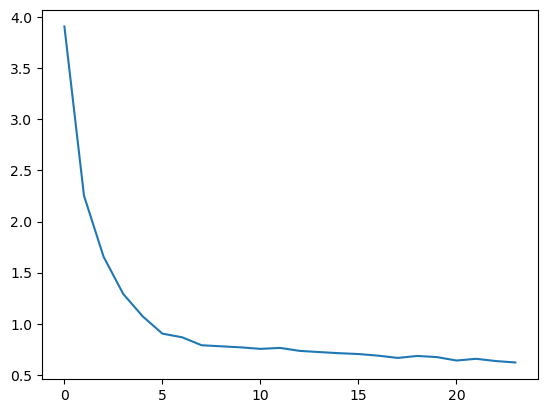

In [81]:
plt.plot(history.history["loss"])